In [1]:
import cv2 as cv
cv.__version__

'3.3.1'

In [2]:
img = cv.imread("./cars/img/S_8167620536848.jpg")

In [3]:
img.shape

(1108, 1478, 3)

In [4]:
import matplotlib.pyplot as plt

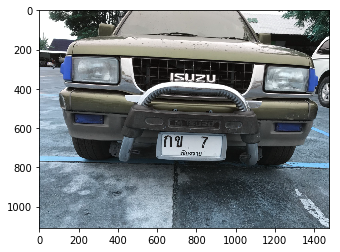

In [5]:
plt.imshow(img)

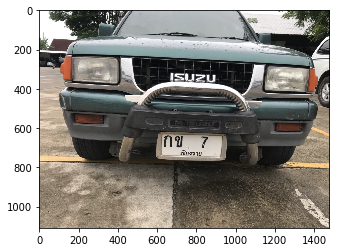

In [6]:
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)

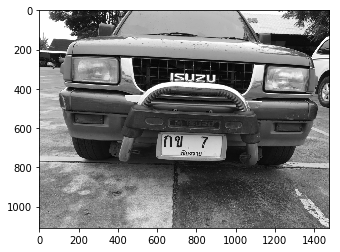

In [7]:
imgGray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
plt.imshow(imgGray,cmap='gray')

In [8]:
import numpy as np

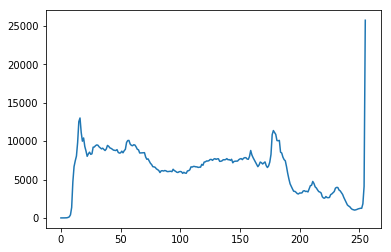

In [9]:
hist,bins = np.histogram(imgGray.ravel(),256,[0,256])
plt.plot(hist)

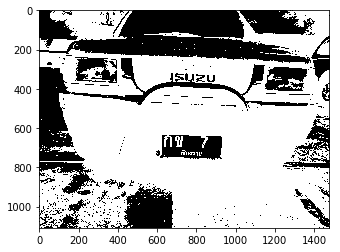

In [10]:
ret,thresh = cv.threshold(imgGray,150,255,cv.THRESH_BINARY_INV)
plt.imshow(thresh,cmap='gray')

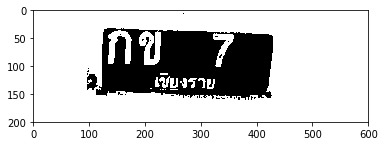

In [11]:
imgCrop = thresh[600:800,500:1100]
plt.imshow(imgCrop,cmap='gray')

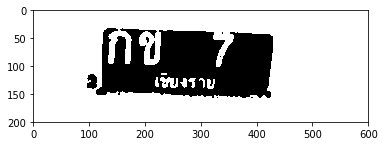

In [12]:
imgBlur = cv.medianBlur(imgCrop, 5);
plt.imshow(imgBlur,cmap='gray')

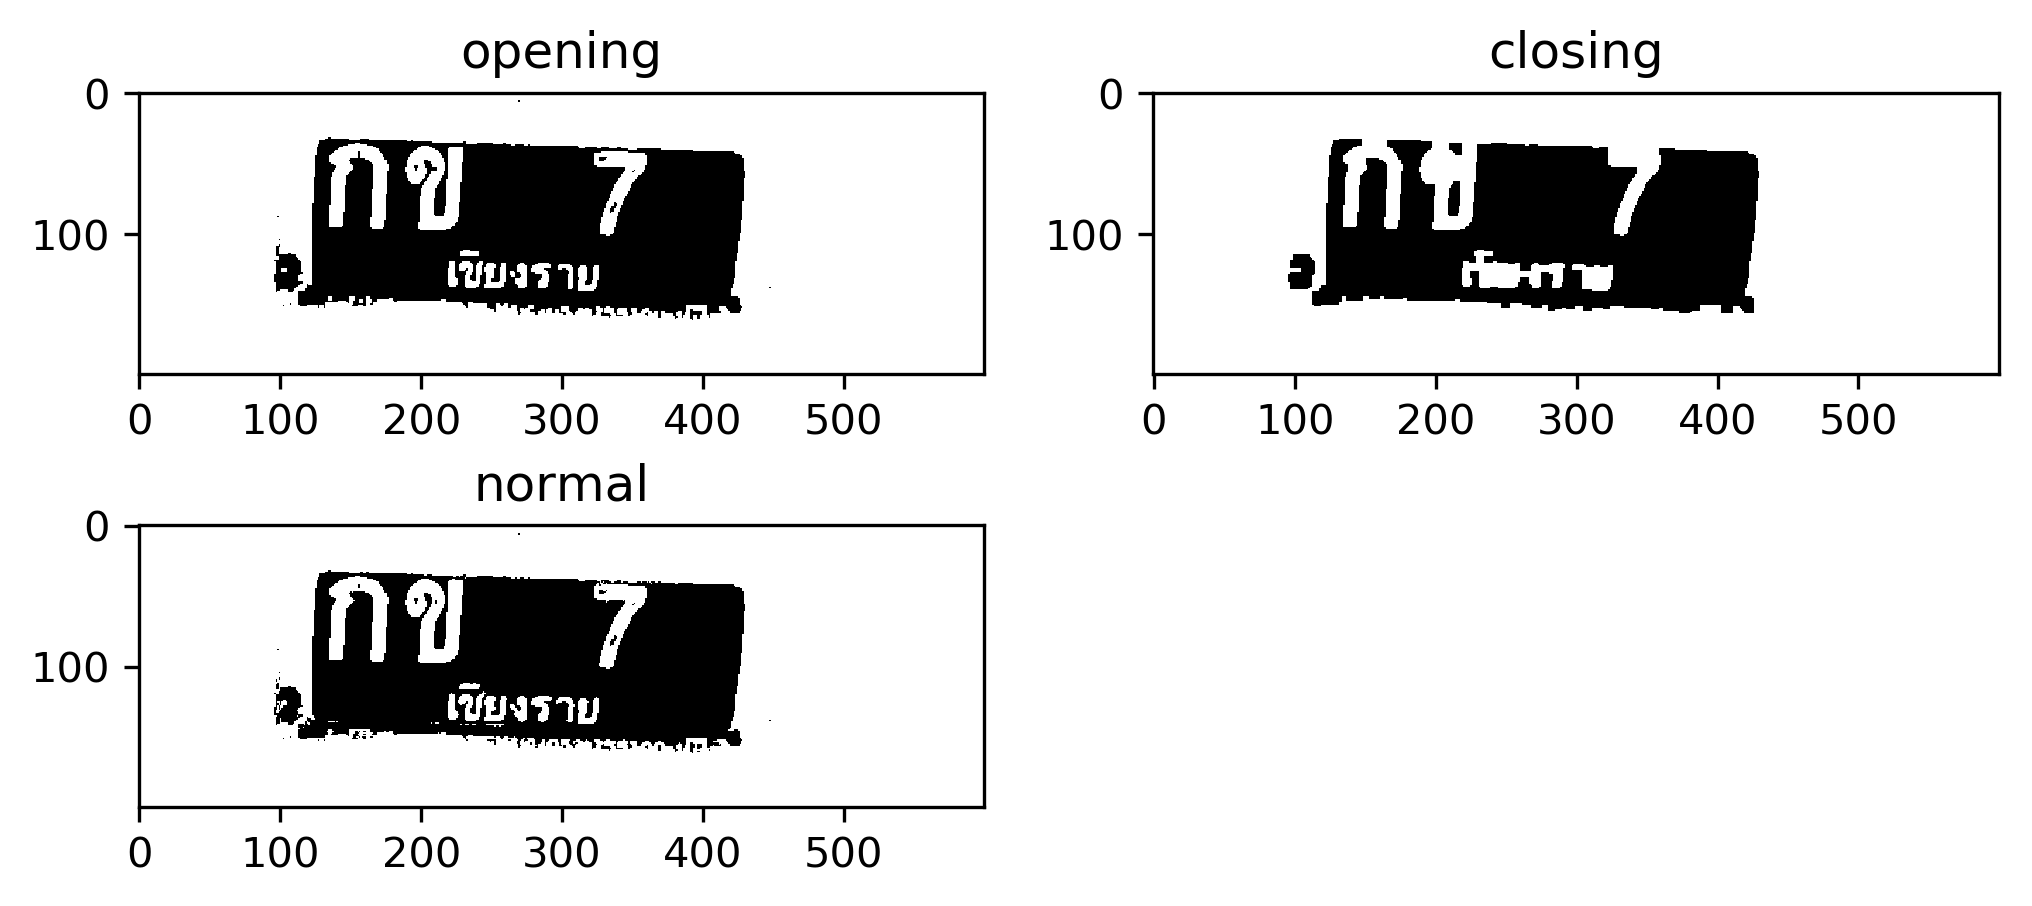

In [13]:
kernel = np.ones((3,3),np.uint8)
kernel2 = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(imgCrop, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel2)

plt.figure(figsize=(8,3.5),dpi=300)
plt.subplot(2,2,1)
plt.title('opening')
plt.imshow(opening,cmap='gray')
plt.subplot(2,2,2)
plt.title('closing')
plt.imshow(closing,cmap='gray')
plt.subplot(2,2,3)
plt.title('normal')
plt.imshow(imgCrop,cmap='gray')

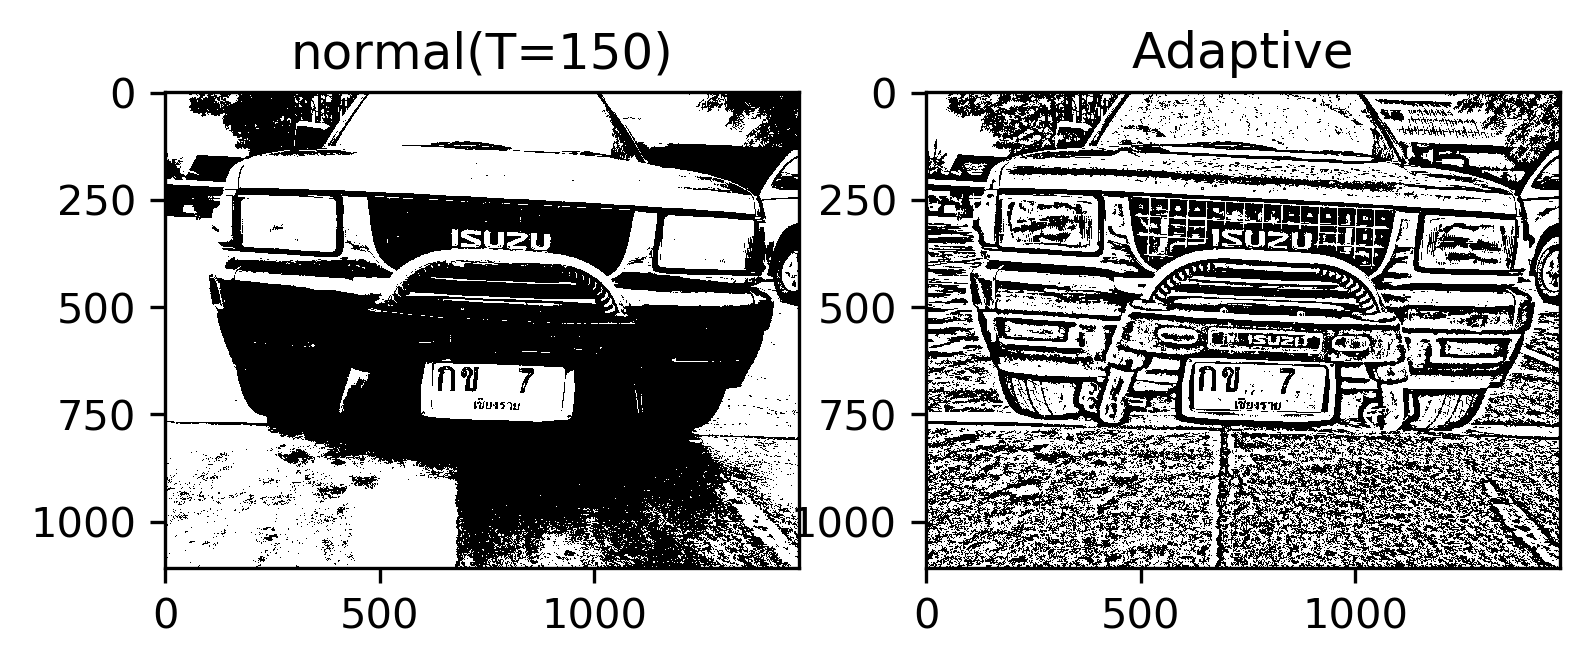

In [14]:
ret,thresh = cv.threshold(imgGray,150,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret,thresh_inv = cv.threshold(imgGray,150,255,cv.THRESH_BINARY_INV)
thres2 = cv.adaptiveThreshold(imgGray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,31,2)
plt.figure(dpi=300)
plt.subplot(1,2,1)
plt.title('normal(T=150)')
plt.imshow(thresh,cmap='gray')
plt.subplot(1,2,2)
plt.title('Adaptive')
plt.imshow(thres2,cmap='gray')

In [15]:
_,contours,_ = cv.findContours(thres2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE);

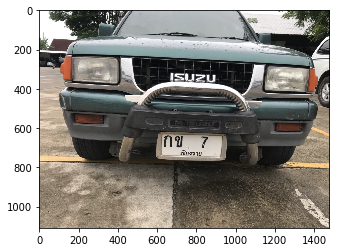

In [16]:
## SAVE RECT
i = 0
w,h,x,y = 0,0,0,0;
img2 = np.asarray(img)
thres3 = np.asarray(thresh)
for contour in contours:
    area = cv.contourArea(contour,False);
    # rough range of areas of a license plate
    if area > 3000 :
#         #if True :
#         print(area)
        [x,y,w,h] = cv.boundingRect(contour);
        outImage = img[y:y+h,x:x+w,:]
        cv.imwrite("./cars/rects/"+str(i)+".jpg",outImage)
        i+=1     
plt.imshow(img2,cmap='gray')